# Cardiovascular Disease Classification

## Problem statement:

CVDs are the number 1 cause of death globally: more people die annually from CVDs than from any other cause. An estimated 17.9 million people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke. Over three quarters of CVD deaths take place in low- and middle-income countries.
Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2015, 82% are in low- and middle-income countries, and 37% are caused by CVDs. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management using counselling and medicines, as appropriate.

In this project, we have performed classification on Cardiovascular Diseases based on the dataset obtained from Kaggle. There are various attributes given dataset such as weight, cholesterol level, glucose level etc which have been used to predict if a patient has cardiovascular disease or not. We have used various classification algorithms so as to determine which algorithm gives the best result and accuracy. The main algorithms that we have used are Logistic Regression, Naive Algorithm, Decision Tree, Random Forest, Support Vector Classifier and K-Means Clustering.
The main steps involved are Preprocessing, Model Fitting, Prediction and Graphical Representation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#reading the dataset
heart = pd.read_csv(r"C:\Users\deven\Documents\ML_Training\Project\dataset\cardio_train.csv", sep=';')

In [3]:
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Getting the shape of the dataset
heart.shape

(70000, 13)

Source : kaggle.com

    Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# Preprocessing

In [5]:
#Dropping the ID of the patient as it wont be helpful for prediction.
heart.drop(['id'], axis=1, inplace = True)

In [6]:
heart.shape

(70000, 12)

In [7]:
heart.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Checking for presence of null values
heart.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
#Checking the datatype of each attribute.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


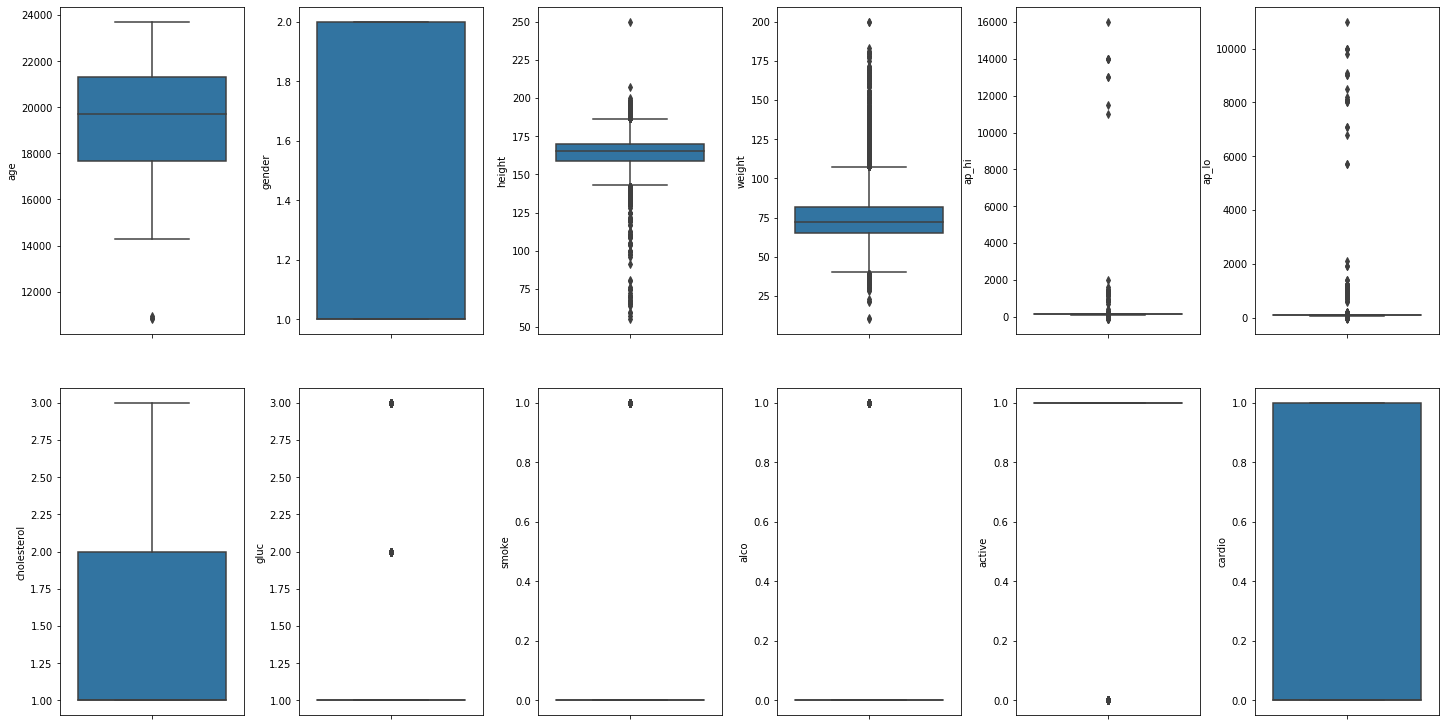

In [10]:
# Univariate Analysis.
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in heart.items():
    sb.boxplot(y = v, data=heart, ax = axs[index])
    index+=1
plt.tight_layout(pad = 0.4, w_pad=0.1, h_pad=5.0)
plt.show()

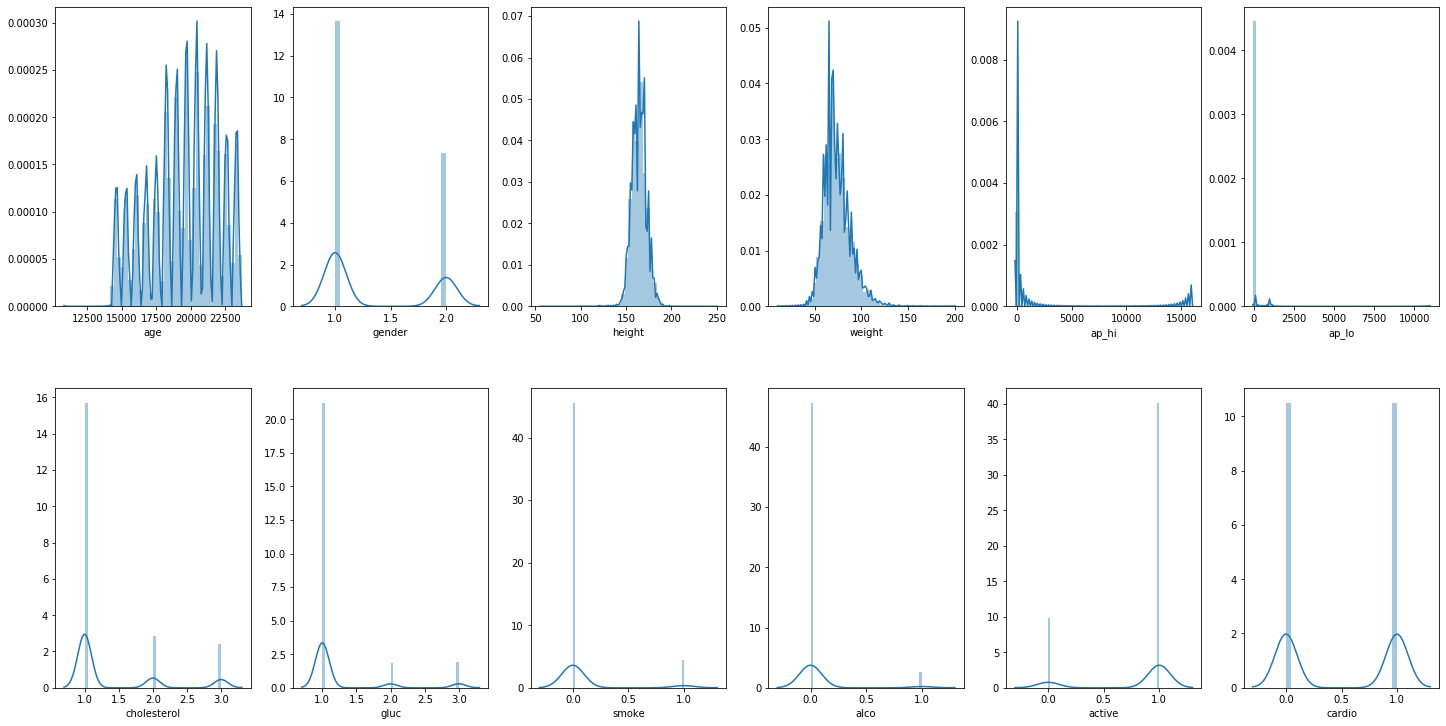

In [11]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in heart.items():
    sb.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) # for some prob write kde
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

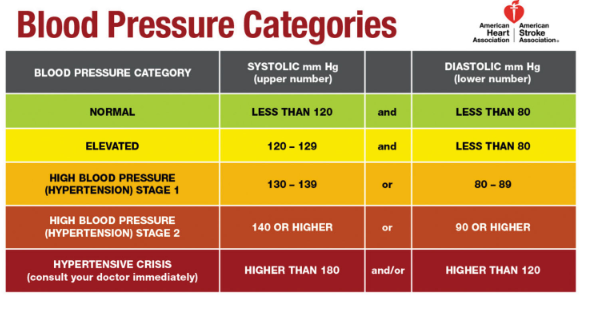

In [12]:
heart['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [13]:
#Removing Outliers from ap_hi 
heart = heart[~((heart['ap_hi']>=400))]

In [14]:
heart = heart[~((heart['ap_hi']<0))]

In [15]:
#Checking on number of rows removed.
heart.shape

(69954, 12)

In [16]:
heart['ap_lo'].describe()

count    69954.000000
mean        96.648069
std        188.531779
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [17]:
#Removing Outliers from ap_lo
heart = heart[~((heart['ap_lo']>=400))]

In [18]:
heart = heart[~((heart['ap_lo']<0))]

In [19]:
heart.shape

(69000, 12)

In [20]:
heart.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000
mean,19463.803101,1.348710,164.359725,74.118225,126.325145,81.332797,1.364377,1.225855,0.087870,0.053594,0.803290,0.494870
std,2468.248368,0.476565,8.204221,14.328629,17.721845,9.877680,0.678695,0.571809,0.283107,0.225217,0.397514,0.499977
min,10798.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17656.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19700.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Analysis

In [21]:
heart['cardio'].value_counts()

0    34854
1    34146
Name: cardio, dtype: int64

It can be seen that the data has almost the same number of cases with cardiovascular disease and non-cardiovascular disease. So, the dataset is unbiased.

In [22]:
#grouping on the basis of gender
heart[['gender', 'cardio']].groupby(['gender'], as_index = False).mean()

,gender,cardio
0,1,0.492112
1,2,0.500021


#### 1->male 
#### 2->female

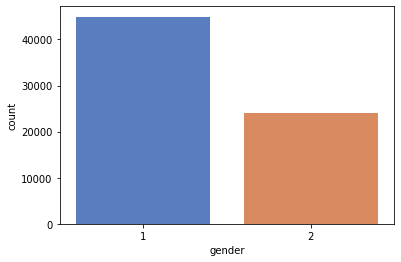

In [23]:
sb.countplot(heart['gender'], palette='muted')

From the countplot it can be seen that there are more number of males in the dataset as compared to the females.
Here 1 denotes Male and 2 denotes Female

In [24]:
#grouping on the basis of cholesterol level
heart[['cholesterol', 'cardio']].groupby(['cholesterol'], as_index = False).mean()

,cholesterol,cardio
0,1,0.435615
1,2,0.596574
2,3,0.762815


#### Here, the cholesterol levels have been divided into 3 categories:
##### 1->normal 
##### 2->above normal
##### 3->well above normal

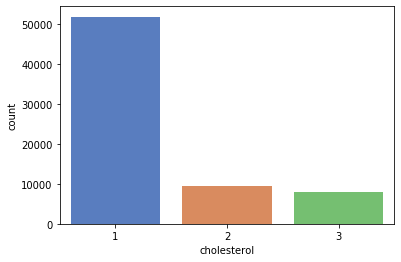

In [25]:
sb.countplot(heart['cholesterol'], palette='muted')

From the cholesterol countplot, it can be seen that the dataset has maximum patients with normal level of cholesterol.

In [26]:
#grouping on the basis of glucose level
heart[['gluc', 'cardio']].groupby(['gluc'], as_index = False).mean()

,gluc,cardio
0,1,0.475709
1,2,0.588640
2,3,0.618140


#### Here, the glucose levels have been divided into 3 categories:
##### 1->normal
##### 2->above normal
##### 3->well above normal


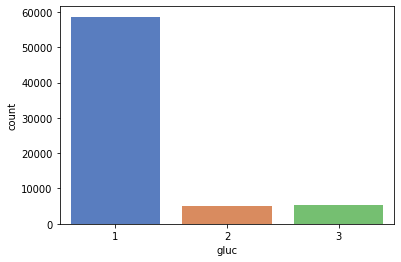

In [27]:
sb.countplot(heart['gluc'], palette='muted')

From the glucose countplot, it can be seen that the dataset has maximum patients with normal level of glucose.

In [28]:
#grouping on the basis of smoking
heart[['smoke', 'cardio']].groupby(['smoke'], as_index = False).mean()

,smoke,cardio
0,0,0.497402
1,1,0.468580


#### 0 -> Non-Smoker
#### 1 -> Smoker

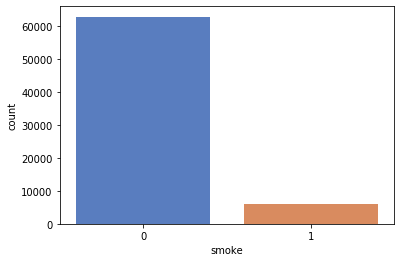

In [29]:
sb.countplot(heart['smoke'], palette='muted')

From the countplot it can be seen that maximum patients in the dataset are non-smokers.

In [30]:
#grouping on the basis of alcohol intake
heart[['alco', 'cardio']].groupby(['alco'], as_index = False).mean()

,alco,cardio
0,0,0.495835
1,1,0.477826


#### 0->True
#### 1->False

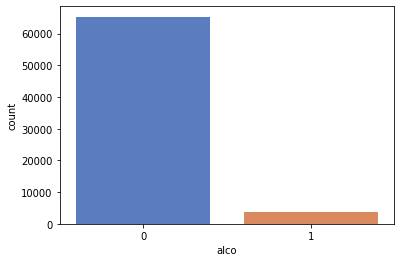

In [31]:
sb.countplot(heart['alco'], palette='muted')

From the countplot it can be seen that maximum patients in the dataset do not take alcohol.

In [32]:
#grouping on the basis of Physical Activity
heart[['active', 'cardio']].groupby(['active'], as_index = False).mean()

,active,cardio
0,0,0.532528
1,1,0.485648


#### 0->True
#### 1->False

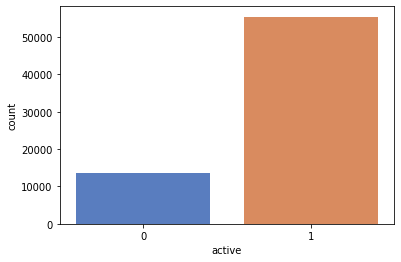

In [33]:
sb.countplot(heart['active'], palette='muted')

From the countplot, it can be seen that maximum patients are active.

In [34]:
#Creating 6 different ranges of age attribute.
heart['AgeBand'] = pd.cut(heart['age'], 6)

In [35]:
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeBand
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,"(17255.5, 19408.0]"
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,"(19408.0, 21560.5]"
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,"(17255.5, 19408.0]"
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,"(17255.5, 19408.0]"
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,"(17255.5, 19408.0]"


In [36]:
#Using the groupby function we find the correlation between Ageband and cardio.
heart[['AgeBand', 'cardio']].groupby('AgeBand', as_index=False).mean()

,AgeBand,cardio
0,"(10785.085, 12950.5]",0.000000
1,"(12950.5, 15103.0]",0.227387
2,"(15103.0, 17255.5]",0.354742
3,"(17255.5, 19408.0]",0.438928
4,"(19408.0, 21560.5]",0.528681
5,"(21560.5, 23713.0]",0.655278


In [37]:
#Dropping the AgeBand attribute.
heart.drop(['AgeBand'], axis=1, inplace=True)

In [38]:
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
#Distributing age into categories to avoid variation(6570=18yrs)
heart.loc[ heart['age'] <= 6570, 'age'] = 0
heart.loc[(heart['age'] > 6570) & (heart['age'] <= 12775), 'age'] = 1
heart.loc[(heart['age'] > 12775) & (heart['age'] <= 18250), 'age'] = 2
heart.loc[(heart['age'] > 18250) & (heart['age'] <= 21900), 'age'] = 3
heart.loc[ heart['age'] > 21900, 'age'] = 4

In [40]:
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,3,2,168,62.0,110,80,1,1,0,0,1,0
1,3,1,156,85.0,140,90,3,1,0,0,1,1
2,3,1,165,64.0,130,70,3,1,0,0,0,1
3,2,2,169,82.0,150,100,1,1,0,0,1,1
4,2,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
heart.shape

(69000, 12)

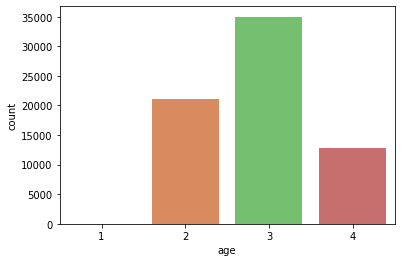

In [42]:
sb.countplot(heart['age'], palette='muted')

From the countplot it can be seen that maximum patients lie the ageband 3(18250-21900]

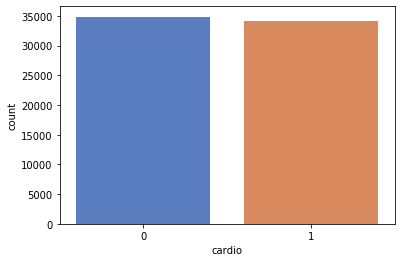

In [43]:
sb.countplot(heart['cardio'], palette='muted')

From the countplot it can be seen that the counts of non-cardio patients(0) is almost equal to that of cardio patients(1)

# Model Fitting and Prediction

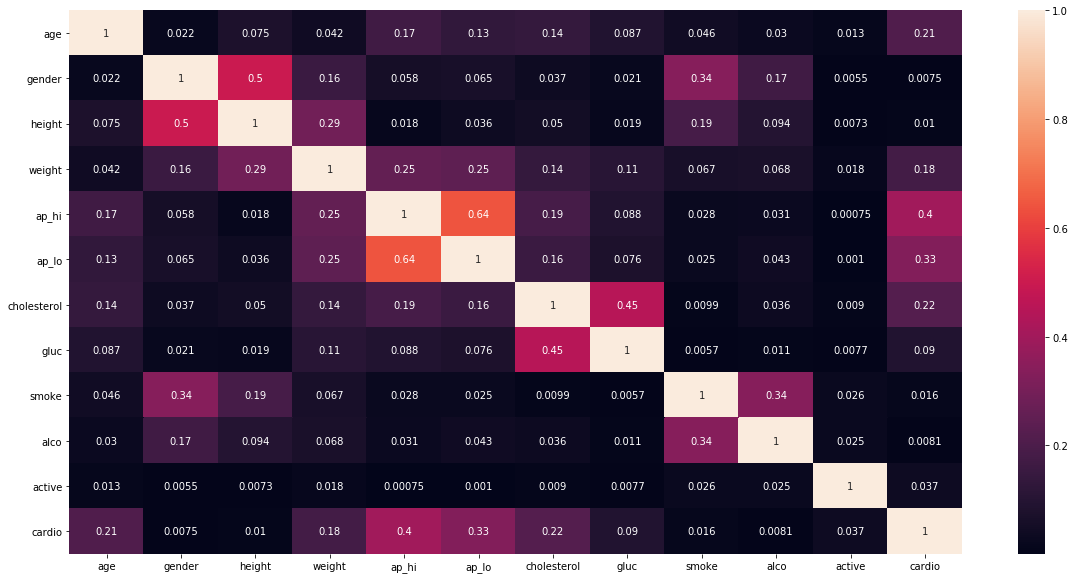

In [44]:
#Checking for linear Relationship
import seaborn as sb
fig, corr = plt.subplots(figsize=(20, 10))
sb.heatmap(heart.corr().abs(), annot=True)
plt.show()

#### From the heatmap, it can be visualized that no two features have strong correlation.

In [45]:
c=heart.corr()

In [46]:
cm=c['cardio']

In [47]:
cm

age            0.209997
gender         0.007539
height        -0.010392
weight         0.180001
ap_hi          0.400911
ap_lo          0.328802
cholesterol    0.221409
gluc           0.089777
smoke         -0.016320
alco          -0.008112
active        -0.037273
cardio         1.000000
Name: cardio, dtype: float64

In [48]:
#Seperating dependent and independent attributes.
X = heart.iloc[:, :11]
Y = heart.iloc[:, -1]

In [49]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,3,2,168,62.0,110,80,1,1,0,0,1
1,3,1,156,85.0,140,90,3,1,0,0,1
2,3,1,165,64.0,130,70,3,1,0,0,0
3,2,2,169,82.0,150,100,1,1,0,0,1
4,2,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,3,2,168,76.0,120,80,1,1,1,0,1
69996,4,1,158,126.0,140,90,2,2,0,0,1
69997,3,2,183,105.0,180,90,3,1,0,1,0
69998,4,1,163,72.0,135,80,1,2,0,0,0


In [50]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69000, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [52]:
#Scalinng the input through Standard Scaler and Splitting the dataset into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

# Prediction using Logistic Regression

In [53]:
#Fitting the train data to the logistic Regression model.
log = LogisticRegression(max_iter=50000)
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred_log = log.predict(x_test)

In [55]:
y_pred_log

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:
y_test

28907    0
22431    0
30300    1
44858    0
62025    1
        ..
29771    1
21824    0
32276    1
61011    1
55452    0
Name: cardio, Length: 13800, dtype: int64

In [57]:
#Checking for accuracy.
(accuracy_score(y_pred_log, y_test))

0.7248550724637681

In [58]:
log.score(x_train, y_train)

0.7257971014492753

In [59]:
confusion_matrix(y_pred_log, y_test)

array([[5484, 2264],
       [1533, 4519]], dtype=int64)

In [60]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7748
           1       0.67      0.75      0.70      6052

    accuracy                           0.72     13800
   macro avg       0.72      0.73      0.72     13800
weighted avg       0.73      0.72      0.73     13800



# Prediction using Naive Baye's Algorithm

In [61]:
#Fitting our data to Naive-Bayes Model
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
# Predicting the Test set results
y_pred_nv = nvclassifier.predict(x_test)
print(y_pred_nv)

[0 0 1 ... 0 1 0]


In [63]:
accuracy_score(y_pred_nv, y_test)

0.7005072463768116

In [64]:
nvclassifier.score(x_train, y_train)

0.7061413043478261

In [65]:
confusion_matrix(y_pred_nv, y_test)

array([[5681, 2797],
       [1336, 3986]], dtype=int64)

In [66]:
print(classification_report(y_pred_nv, y_test))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      8478
           1       0.59      0.75      0.66      5322

    accuracy                           0.70     13800
   macro avg       0.70      0.71      0.70     13800
weighted avg       0.72      0.70      0.70     13800



#### So it can be seen that the accuracy score of Naive Baye's is less than that of the Logistic Regression. 

# Prediction using Decision Tree

In [67]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier(min_samples_split=0.1)
# Train Decision Tree Classifer
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
#Predict the response for test dataset
y_pred_dt = decision_tree.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_pred_dt, y_test)

0.7234057971014493

In [72]:
decision_tree.score(x_train, y_train)

0.7242391304347826

#### We can see that the accuracy score of Decision Tree Classifier is almost equal to Logistic Regression. 

# Prediction using Random Forest 

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [74]:
#Create a Gaussian Classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=0, min_samples_split=0.1)
#Train the model using the training sets y_pred=clf.predict(X_test)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

In [75]:
accuracy_score(y_pred_rf, y_test)

0.7244202898550725

In [76]:
random_forest.score(x_train, y_train)

0.7250543478260869

# Prediction using SVC

In [77]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear')
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
y_pred_svc = svc_classifier.predict(x_test)

In [79]:
accuracy_score(y_pred_svc, y_test)

0.7239855072463768

In [80]:
svc_classifier.score(x_train, y_train)

0.7246376811594203

In [81]:
confusion_matrix(y_pred_svc,y_test)

array([[5754, 2546],
       [1263, 4237]], dtype=int64)

In [82]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      8300
           1       0.62      0.77      0.69      5500

    accuracy                           0.72     13800
   macro avg       0.72      0.73      0.72     13800
weighted avg       0.74      0.72      0.73     13800



# Prediction using K-Means Clustering

In [83]:
x = heart.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,random_state = 0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [85]:
y_pred_km=kmeans.predict(x)

In [86]:
y_pred_km

array([0, 1, 0, ..., 1, 1, 0])

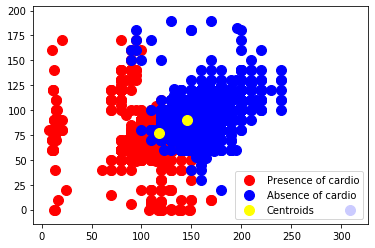

In [87]:
#Visualising the clusters
plt.scatter(x[y_pred_km == 0, 4], x[y_pred_km == 0, 5], s = 100, c = 'red', label = 'Presence of cardio')
plt.scatter(x[y_pred_km == 1, 4], x[y_pred_km == 1, 5], s = 100, c = 'blue', label = 'Absence of cardio')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:,5], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

# Graphical Representation of Accuracy Scores for Supervised Algorithms:

In [88]:
scores=[]
scores.append(accuracy_score(y_pred_log,y_test))
scores.append(accuracy_score(y_pred_nv,y_test))
scores.append(accuracy_score(y_pred_dt,y_test))
scores.append(accuracy_score(y_pred_rf,y_test))
scores.append(accuracy_score(y_pred_svc,y_test))

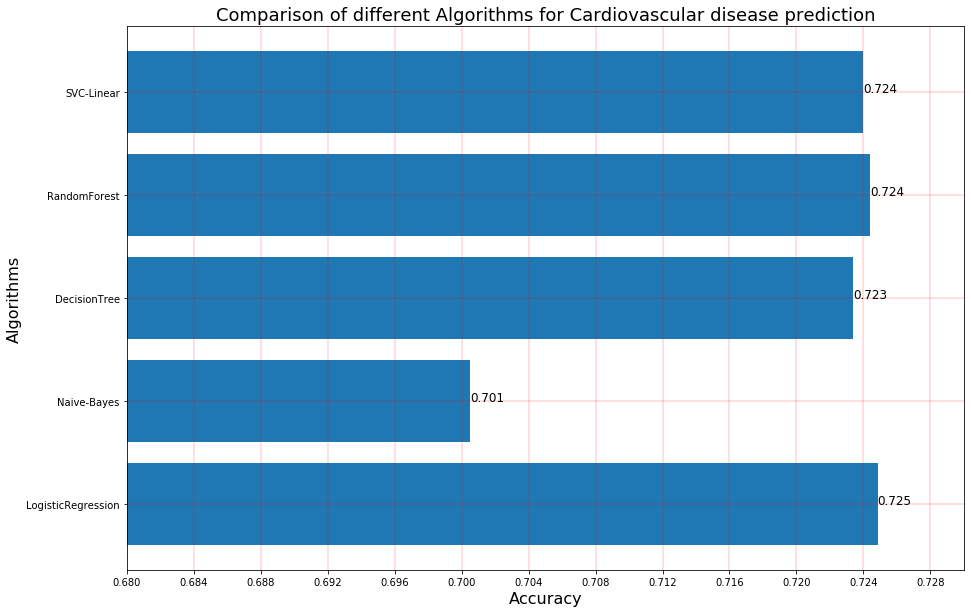

In [89]:
Algo = ['LogisticRegression', 'Naive-Bayes', 'DecisionTree', 'RandomForest', 'SVC-Linear']
plt.figure(figsize=(15, 10))
plt.barh(Algo, scores)
plt.title('Comparison of different Algorithms for Cardiovascular disease prediction', fontsize = 18)
plt.grid(linewidth='0.25', color='red')
plt.xticks(np.arange(0.68, 0.73, 0.004))
plt.ylabel('Algorithms', fontsize = 16)
plt.xlabel('Accuracy', fontsize = 16)
plt.xlim([0.68, 0.73])

for index, value in enumerate(scores):
    plt.text(value, index, str("{:.3f}".format(value)), fontsize=12)

plt.show()

# Conclusion

From the above graph, it can be inferred that for the accuracy score of Logistic Regression is the highest among all the others i.e 72.5%; followed by SVC-Linear(72.4%) and RandomForest (72.4%), DecisionTree(72.3%) and Naive Baye's(70.1%).